## Non Linear Dimensionality Reduction Techniques

In [2]:
##Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding, TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import time

In [4]:
##Reading File
File = pd.read_csv("DataB.csv")
print(File)

##Removing first index column from file
Clean_data_df = File.iloc[:,1:786]
print(Clean_data_df)

##Separating Data from file (No Missing Values)
Data_df = Clean_data_df.iloc[:,0:784]
print(Data_df)
#print((np.array(Data_df)).shape)
data_array = Data_df.values
print('Data Array:\n', data_array)

##Separating gnd values from file
Value_df = Clean_data_df.iloc[:,784]
print(Value_df)

      Unnamed: 0  fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  \
0              1      4      4      3      0      0      4      2      1   
1              2      5      1      4      3      1      3      5      1   
2              3      1      3      0      3      1      1      0      1   
3              4      5      3      2      3      5      2      2      0   
4              5      3      5      3      3      0      4      1      1   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
2061        2062      4      0      3      0      4      0      4      3   
2062        2063      2      2      3      4      2      1      2      3   
2063        2064      2      3      2      3      1      2      5      5   
2064        2065      5      2      4      3      1      0      3      2   
2065        2066      3      3      1      3      2      5      4      2   

      fea.9  ...  fea.776  fea.777  fea.778  fea.779  fea.780  fea.781  \
0         4  

#### 1) Kernel PCA

In [8]:
##FOR KERNEL PCA:
##n_components = 2, kernel = RBF
start1 = time.time()
print('FOR KERNEL PCA:\n')
KPCA = KernelPCA(n_components=2, kernel='rbf', random_state=42)
KPCA_transformed = KPCA.fit_transform(data_array)
print(KPCA_transformed.shape)       #(414,2)
print(KPCA_transformed)
end1 = (time.time() - start1)
print('Time Taken By Kernel PCA: ', end1)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')



FOR KERNEL PCA:

(2066, 2)
[[-0.01029396 -0.03936578]
 [-0.04721058  0.06238533]
 [ 0.00419987 -0.00260408]
 ...
 [-0.00025586 -0.00128283]
 [-0.00187547  0.00089978]
 [ 0.00096538 -0.00442111]]
Time Taken By Kernel PCA:  0.35631275177001953
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


#### 2) ISOMAP

In [9]:
###FOR ISOMAP:
start2 = time.time()
print('FOR ISOMAP:\n')
ISO_MAP = Isomap(n_components=2)
ISOMAP_transformed = ISO_MAP.fit_transform(data_array)
print(ISOMAP_transformed.shape)
print(ISOMAP_transformed)
end2 = (time.time() - start2)
print('Time Taken By ISOMAP: ', end2)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

FOR ISOMAP:

(2066, 2)
[[ 8706.04995215  -344.12740513]
 [ 8858.82115353  -333.86612857]
 [ 3954.25208909  -926.79502703]
 ...
 [-1338.73814549  5698.9432188 ]
 [-3704.88624029  3550.95627311]
 [-3057.39031266  3058.27240364]]
Time Taken By ISOMAP:  7.934340000152588
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


#### 3) Local Linear Embedding

In [10]:
###FOR LOCAL LINEAR EMBEDDING:
start3 = time.time()
print('FOR LLE:\n')
LLE = LocallyLinearEmbedding(n_components=2, random_state=42)
LLE_transformed = LLE.fit_transform(data_array)
print(LLE_transformed.shape)
print(LLE_transformed)
end3 = (time.time() - start3)
print('Time Taken By LLE: ', end3)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')


FOR LLE:

(2066, 2)
[[-0.04525809 -0.00086208]
 [-0.04506047 -0.00082753]
 [-0.04457279 -0.00092552]
 ...
 [ 0.01156693  0.02228235]
 [ 0.01155453  0.02064838]
 [ 0.01154524  0.0162891 ]]
Time Taken By LLE:  6.47053074836731
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


#### 4) FOR LAPLACIAN EIGENMAP (Spectral Embedding)

In [12]:
###FOR LAPLACIAN EIGENMAP (Spectral Embedding)
start4 = time.time()
print('FOR LAPLACIAN EIGENMAP:\n')
SE = SpectralEmbedding(n_components=2, random_state=42)
SE_transformed = SE.fit_transform(data_array)
print(SE_transformed.shape)
print(SE_transformed)
end4 = (time.time() - start4)
print('Time Taken By Laplacian Eigenmap: ', end4)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')


FOR LAPLACIAN EIGENMAP:

(2066, 2)
[[ 3.74827714e-03 -1.14693223e-04]
 [ 3.84803136e-03 -1.55366099e-04]
 [ 2.05177929e-03 -8.15044182e-05]
 ...
 [-5.76562883e-04  3.35308606e-03]
 [-6.27513638e-04  2.26301670e-03]
 [-9.43235326e-04  6.63137336e-04]]
Time Taken By Laplacian Eigenmap:  10.0513596534729
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


#### 5) t-SNE

In [ ]:
###FOR t-SNE
start5 = time.time()
print('FOR TSNE:\n')

t_SNE = TSNE(n_components=2, random_state=42)
t_SNE_transformed  = t_SNE.fit_transform(data_array)
print(t_SNE_transformed.shape)
print(t_SNE_transformed)
end5 = (time.time() - start5)
print('Time Taken By LLE: ', end5)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

In [6]:
# ## Converting Embeddings into Dataframe for scatter plots 
# ## Embeddings: t_SNE_transformed, SE_transformed, LLE_transformed, ISOMAP_transformed, KPCA_transformed
print('********************DATAFRAME CONVERSION FOR SCATTER PLOTS**************************************')
print('FOR KERNEL PCA:\n')
Kernel_PCA_df = pd.DataFrame(KPCA_transformed)
KPCA_values_df = pd.concat([Kernel_PCA_df.reset_index(drop=True), Value_df.reset_index(drop=True)], axis=1)
KPCA_values_df.columns = ['Component1', 'Component2', 'gnd']
print(KPCA_values_df)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

print('FOR ISOMAP:\n')
ISOMAP_df = pd.DataFrame(ISOMAP_transformed)
ISOMAP_values_df = pd.concat([ISOMAP_df.reset_index(drop=True), Value_df.reset_index(drop=True)], axis=1)
ISOMAP_values_df.columns = ['Component1', 'Component2', 'gnd']
print(ISOMAP_values_df)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

print('FOR LLE:\n')
LLE_df = pd.DataFrame(LLE_transformed)
LLE_values_df = pd.concat([LLE_df.reset_index(drop=True), Value_df.reset_index(drop=True)], axis=1)
LLE_values_df.columns = ['Component1', 'Component2', 'gnd']
print(LLE_values_df)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

print('FOR Spectral Embedding:\n')
SE_df = pd.DataFrame(SE_transformed)
SE_values_df = pd.concat([SE_df.reset_index(drop=True), Value_df.reset_index(drop=True)], axis=1)
SE_values_df.columns = ['Component1', 'Component2', 'gnd']
print(SE_values_df)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

print('FOR TSNE:\n')
t_SNE_df = pd.DataFrame(t_SNE_transformed)
t_SNE_values_df = pd.concat([t_SNE_df.reset_index(drop=True), Value_df.reset_index(drop=True)], axis=1)
t_SNE_values_df.columns = ['Component1', 'Component2', 'gnd']
print(t_SNE_values_df)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

********************DATAFRAME CONVERSION FOR SCATTER PLOTS**************************************
FOR KERNEL PCA:

      Component1  Component2  gnd
0      -0.010294   -0.039366    0
1      -0.047211    0.062385    0
2       0.004200   -0.002604    0
3       0.003567   -0.013048    0
4       0.008474    0.176367    0
...          ...         ...  ...
2061   -0.000270   -0.001936    4
2062    0.000497   -0.004419    4
2063   -0.000256   -0.001283    4
2064   -0.001875    0.000900    4
2065    0.000965   -0.004421    4

[2066 rows x 3 columns]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
FOR ISOMAP:

        Component1   Component2  gnd
0      8706.049952  -344.127405    0
1      8858.821154  -333.866129    0
2      3954.252089  -926.795027    0
3      5791.867059  -643.647584    0
4     10700.083472   281.608819    0
...            ...          ...  ...
2061  -2332.044810  5245.708873    4
2062  -3756.861995  4963.734649    4
2063 

Kernel PCA:



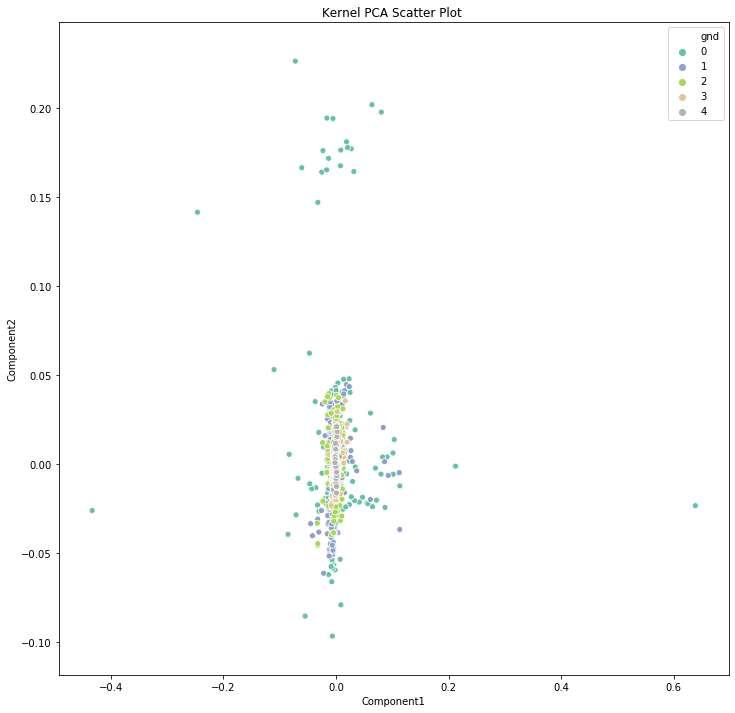

-------------------------------------------------------------------------------------------------------------------
ISOMAP:



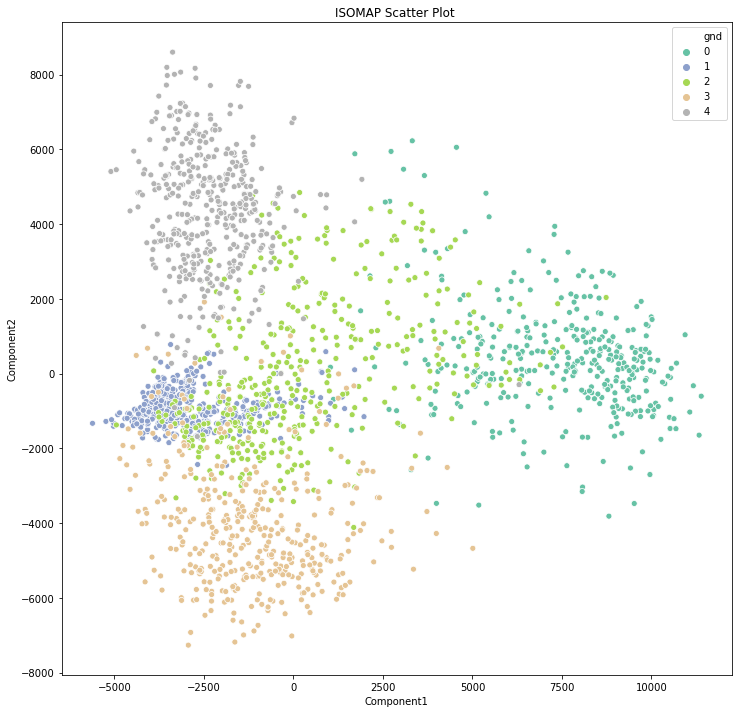

-------------------------------------------------------------------------------------------------------------------
LLE:



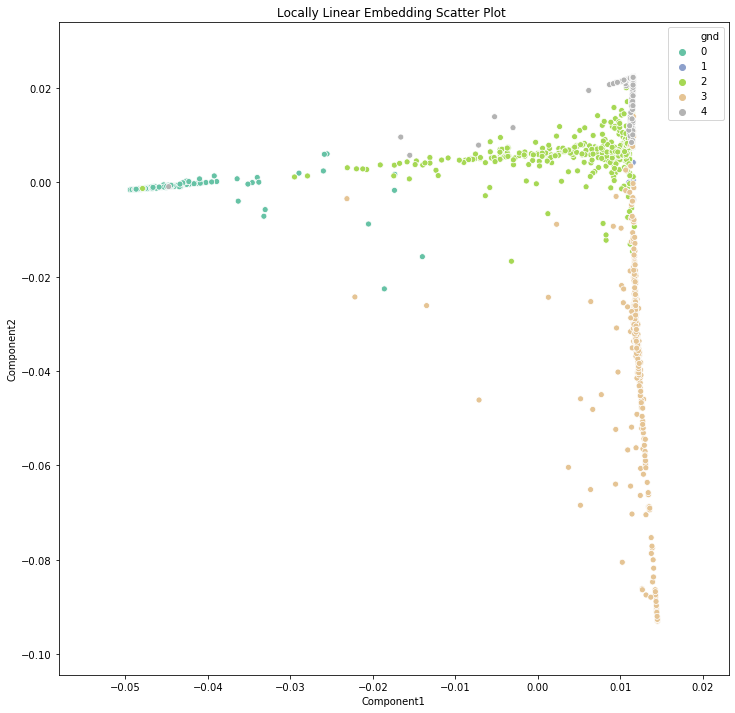

-------------------------------------------------------------------------------------------------------------------
Spectral Embedding:



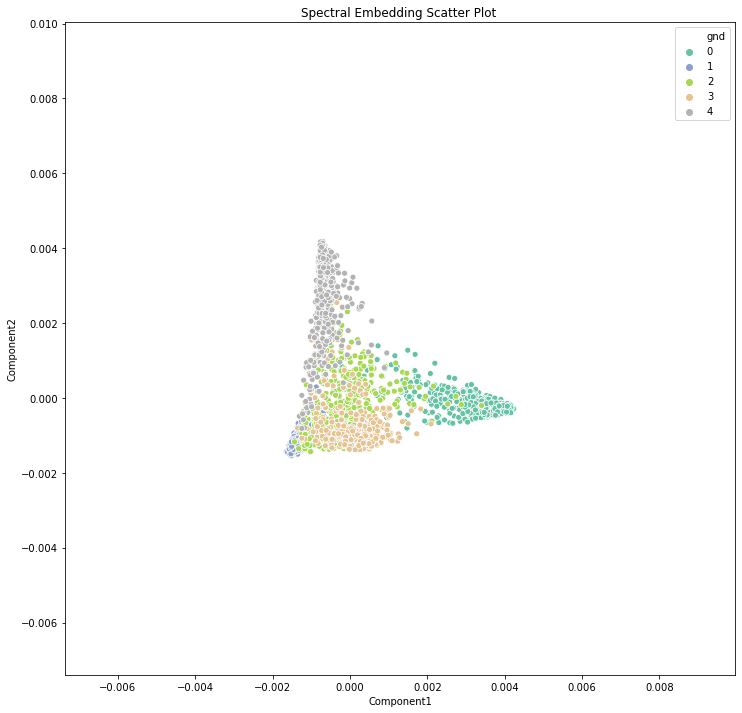

-------------------------------------------------------------------------------------------------------------------
T-SNE:



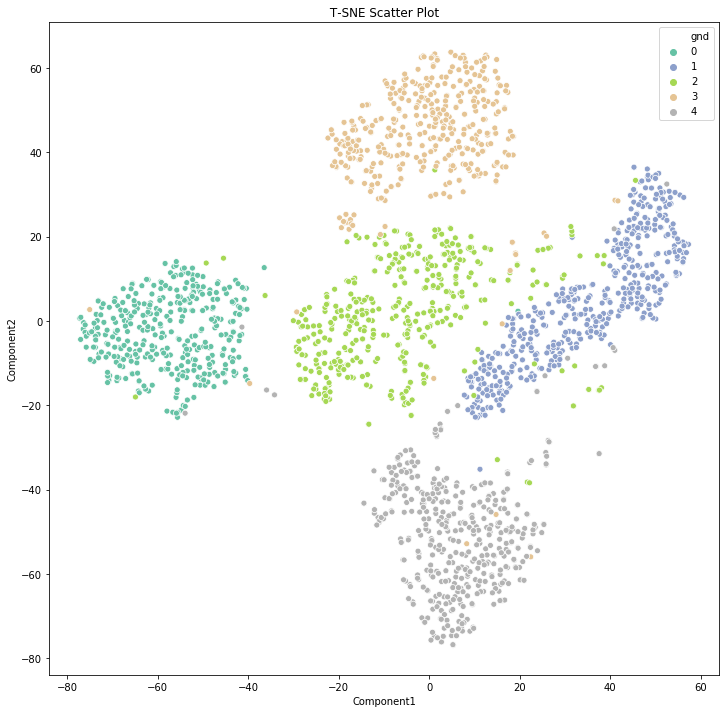

-------------------------------------------------------------------------------------------------------------------


In [7]:
##Plotting Scatter plot
fig, axes = plt.subplots(figsize=(12,12))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

##Kernel PCA
print('Kernel PCA:\n')
sns.scatterplot(data=KPCA_values_df, x='Component1', y='Component2', hue='gnd', hue_norm=(0,4), palette='Set2', ax=axes, cmap=cmap, legend='full')
plt.title('Kernel PCA Scatter Plot ')
plt.show() 
print('-------------------------------------------------------------------------------------------------------------------')

##ISOMAP
print('ISOMAP:\n')
fig, axes = plt.subplots(figsize=(12,12))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(data=ISOMAP_values_df, x='Component1', y='Component2', hue='gnd', hue_norm=(0,4), palette='Set2', ax=axes, cmap=cmap, legend='full')
plt.title('ISOMAP Scatter Plot ')
plt.show()
print('-------------------------------------------------------------------------------------------------------------------')
 
#LLE
print('LLE:\n')
fig, axes = plt.subplots(figsize=(12,12))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(data=LLE_values_df, x='Component1', y='Component2', hue='gnd', hue_norm=(0,4), palette='Set2', ax=axes, cmap=cmap, legend='full')
plt.title('Locally Linear Embedding Scatter Plot ')
plt.show()
print('-------------------------------------------------------------------------------------------------------------------')

#SE
print('Spectral Embedding:\n')
fig, axes = plt.subplots(figsize=(12,12))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(data=SE_values_df, x='Component1', y='Component2', hue='gnd', hue_norm=(0,4), palette='Set2', ax=axes, cmap=cmap, legend='full')
plt.title('Spectral Embedding Scatter Plot ')
plt.show()
print('-------------------------------------------------------------------------------------------------------------------')

##t-SNE
print('T-SNE:\n')
fig, axes = plt.subplots(figsize=(12,12))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(data=t_SNE_values_df, x='Component1', y='Component2', hue='gnd', hue_norm=(0,4), palette='Set2', ax=axes, cmap=cmap, legend='full')
plt.title(' T-SNE Scatter Plot ')
plt.show()
print('-------------------------------------------------------------------------------------------------------------------')

#### Analysis:
- **Non linear data of all the 5 classes (gnd) are linearly separable and distinguishable in T-SNE Scatter Plot**. However, major drawback of using **T-SNE Algorithm is its highest time complexity** as compared to other algorithms (Kernel PCA, ISOMAP, Local Linear Embedding etc). T-SNE has extracted clustered local groups of samples of 5 classes.
- **In Local Linear Embedding, if we draw a horizontal line we can segregrate Class 2 and Class 0 along X axis whereas if we draw a vertical line Class 3 and Class 4 are separable along Y axis.** 
- **In Spectral Embedding Scatter plot, local clusters of data of classes 0, 1, 3 and 4** has been created except for class 2 whose data distribution is mixed with other classes as well. In addition, Class 1 is not visible in the scatter plot. 
- ISOMAP is able to create wide clusters of different classes except for Class 2 but still it does not portray any useful information.
- In Kernel PCA, all the classes are stacked on top of one another and does not provide any useful information.
- Time taken by following techniques:

Time Taken By Kernel PCA:  2.1sec

Time Taken By ISOMAP:  7.7sec

Time Taken By LLE:  6.30sec

Time Taken By Laplacian Eigenmap:  9.99sec

Time Taken By LLE:  16.7sec


In the case of non linear manifold, main concern is to put similar data together in lower dimension whereas method like PCA focusses on putting dis-similar datapoints far away in lower dimension.

**Best Method to use for this dataset would be T-SNE as it provides clear local data cluster of all the 5 classes.**

-----------------------------------------------------------------------------------------------------------------------------


***Design Tradeoff:*** 

In order to minimise the time taken by T-SNE, it is recommended to perform PCA on dataset before applying T-SNE. T-SNE works well even if features have polynomial relationship among themselves. 
